In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [5]:
file_path = r'loan_data.csv'
loan_data = pd.read_csv(file_path)
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
numerical_summary = loan_data.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.000000,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000
int.rate,9578.000000,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,0.216400
installment,9578.000000,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,940.140000
log.annual.inc,9578.000000,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,14.528354
dti,9578.000000,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,29.960000
fico,9578.000000,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,827.000000
days.with.cr.line,9578.000000,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,17639.958330
revol.bal,9578.000000,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1207359.000000
revol.util,9578.000000,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,119.000000
inq.last.6mths,9578.000000,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,33.000000


In [11]:
# Check for missing values in each column
missing_data = loan_data.isnull().sum()

# Display columns with missing values (if any)
missing_data = missing_data[missing_data > 0]
missing_data

Series([], dtype: int64)

In [13]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


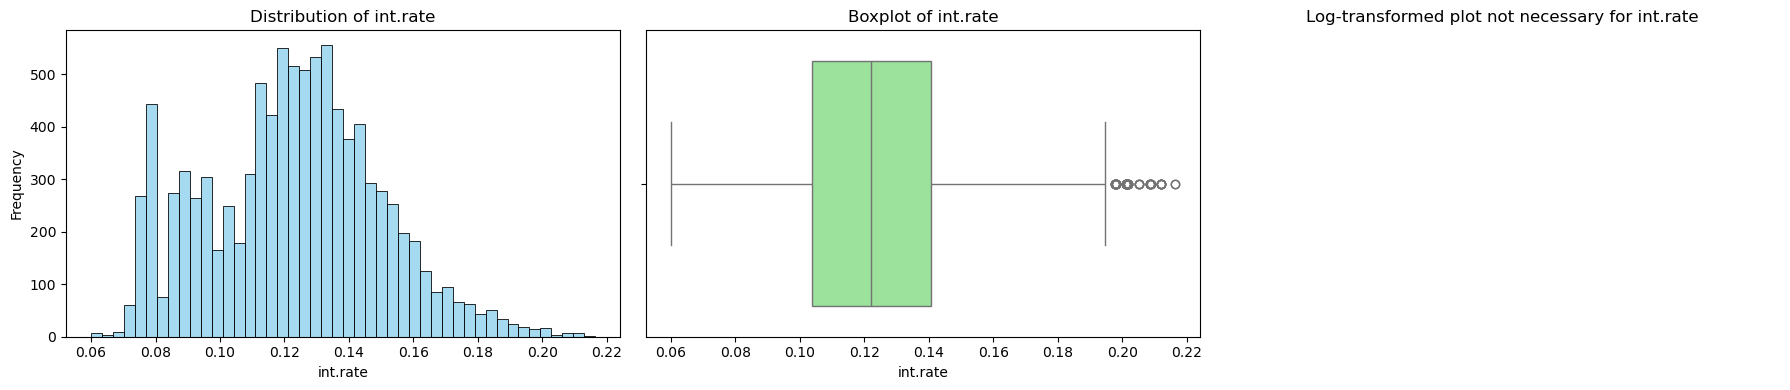

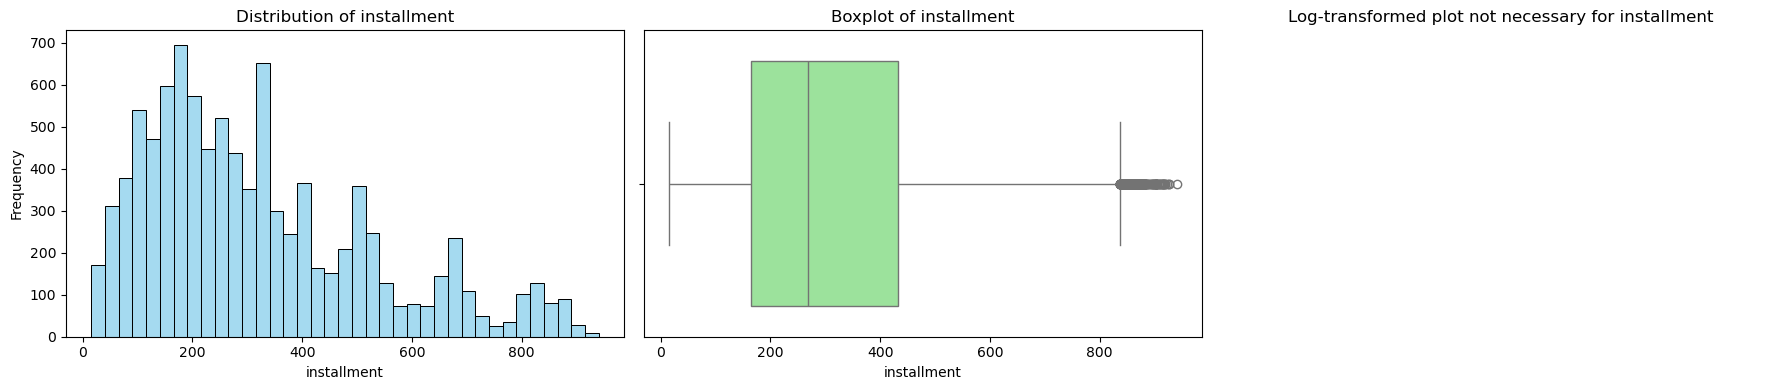

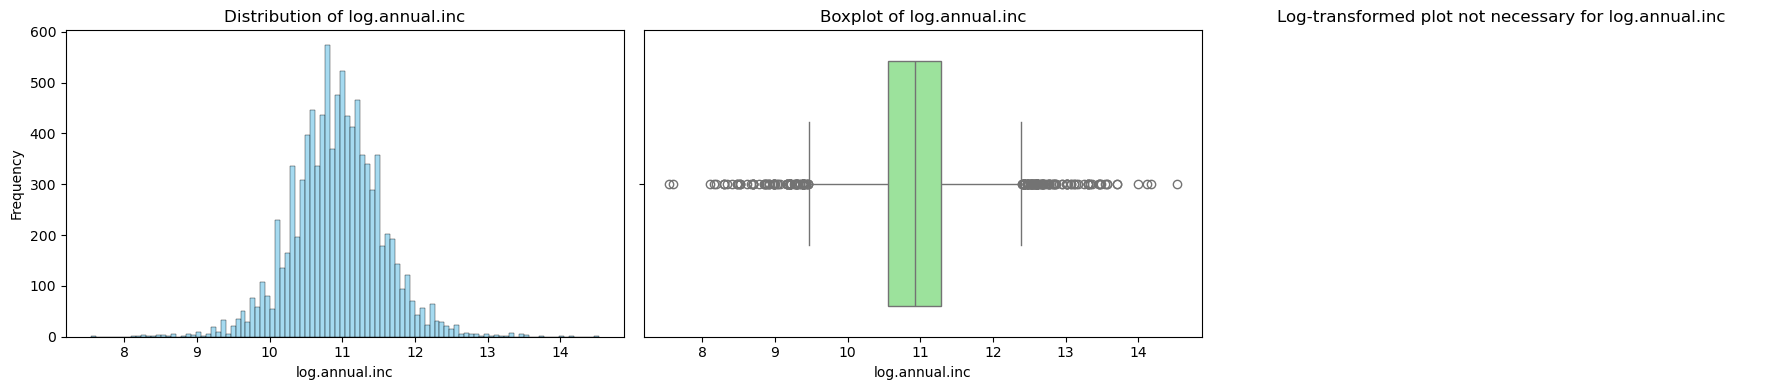

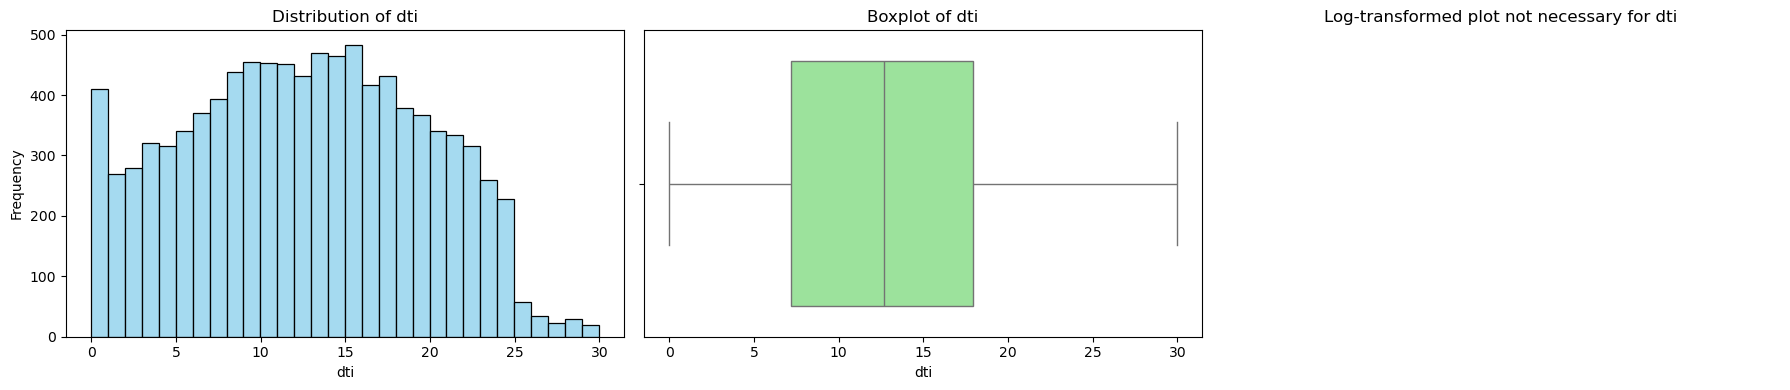

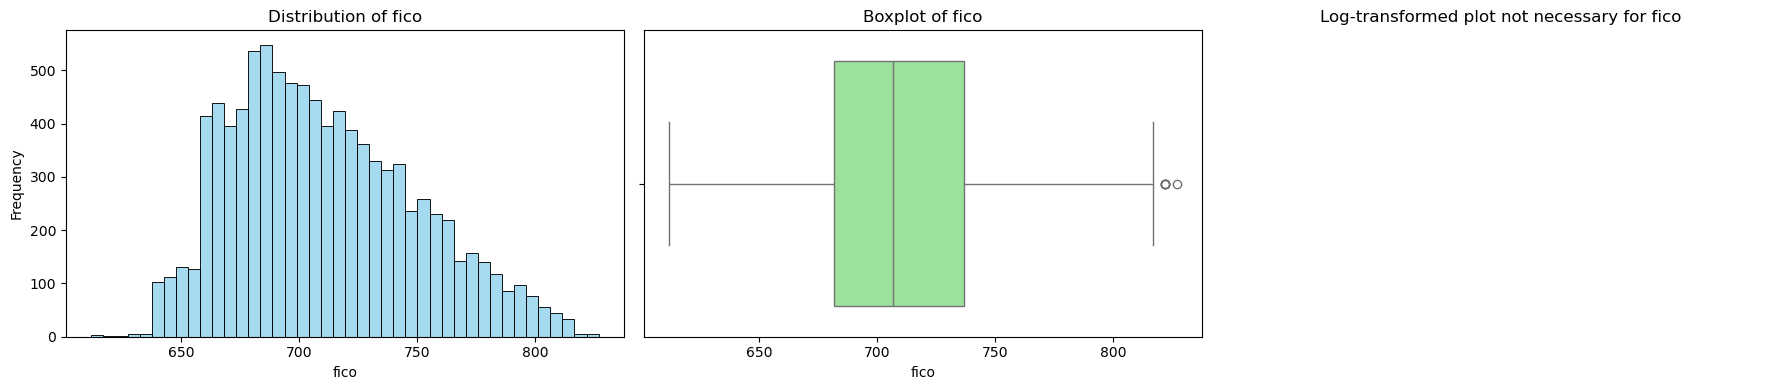

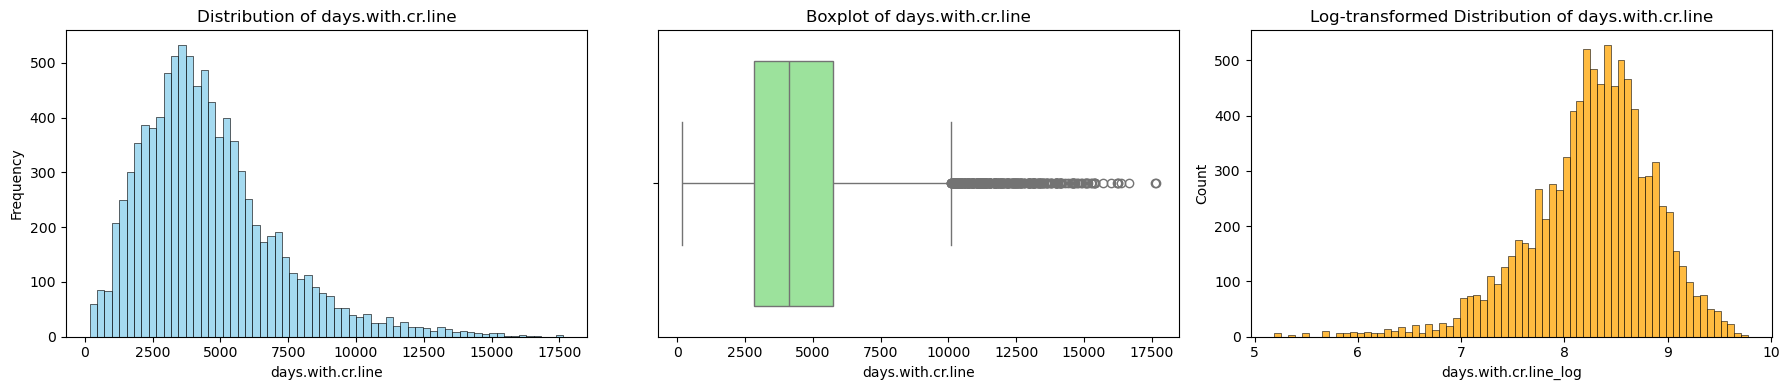

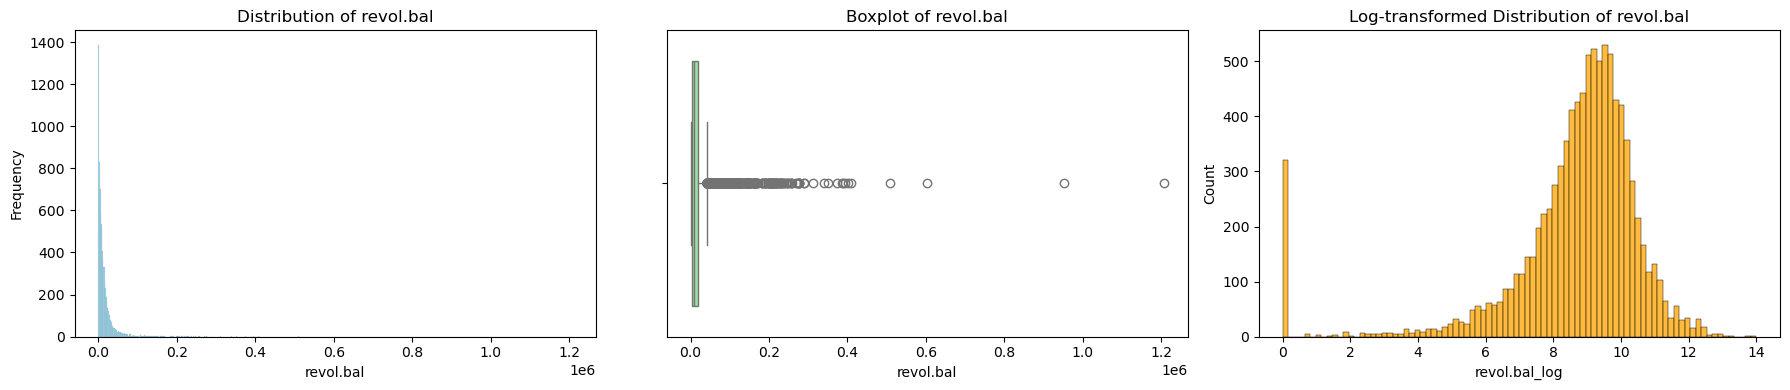

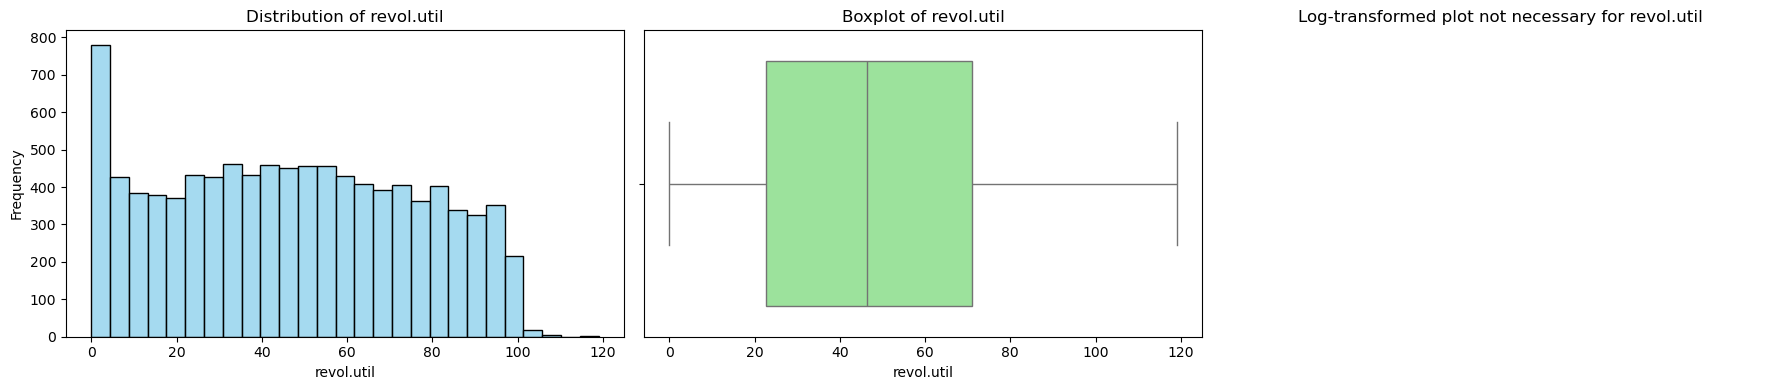

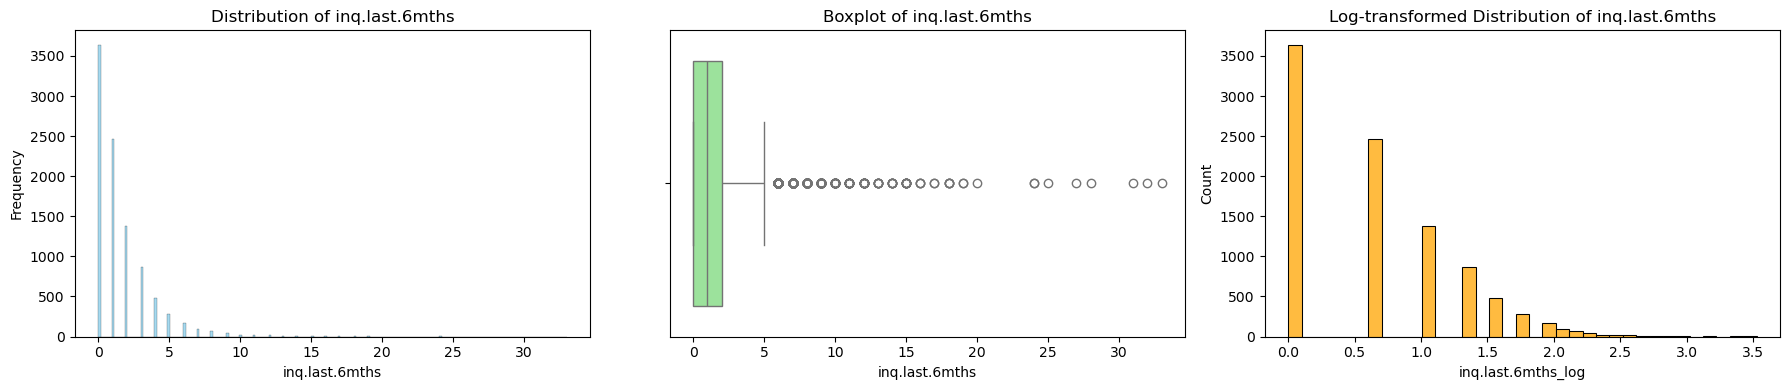

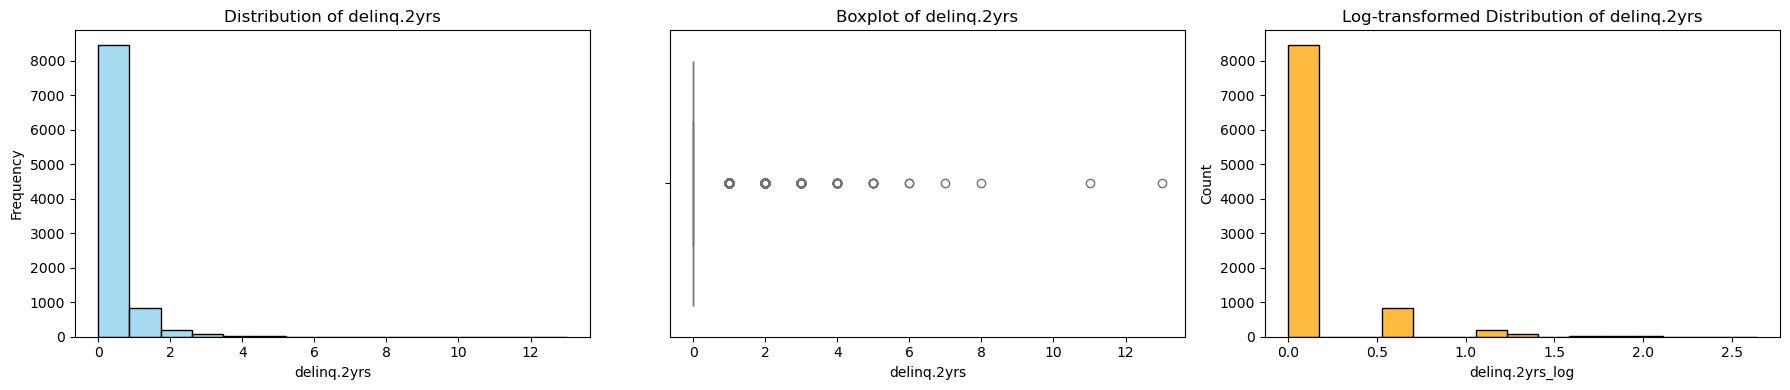

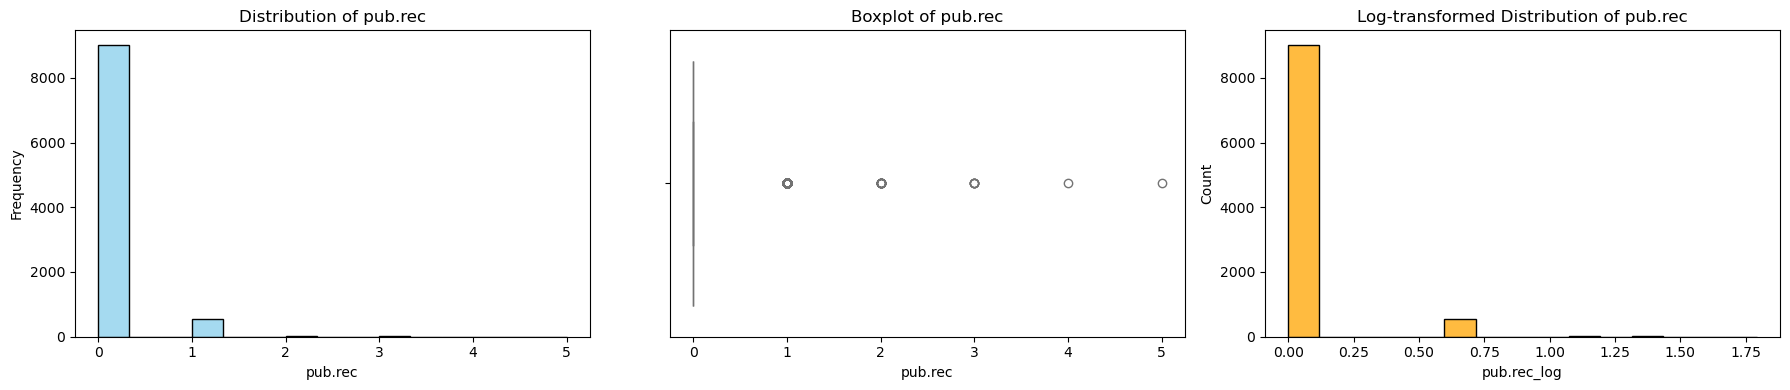

In [15]:
non_boolean_numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 
                                  'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 
                                  'delinq.2yrs', 'pub.rec']
boolean_numeric_features = ['credit.policy', 'not.fully.paid']

# Visualize the distributions and box plots for numerical features, including log-transformed versions for skewed data
for column in non_boolean_numerical_features:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # Histogram for the distribution
    sns.histplot(loan_data[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')

    # Boxplot for the variable
    sns.boxplot(x=loan_data[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')

    # Log transformation and plot if the data is skewed
    if loan_data[column].skew() > 1:
        loan_data[column+'_log'] = np.log1p(loan_data[column])
        sns.histplot(loan_data[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

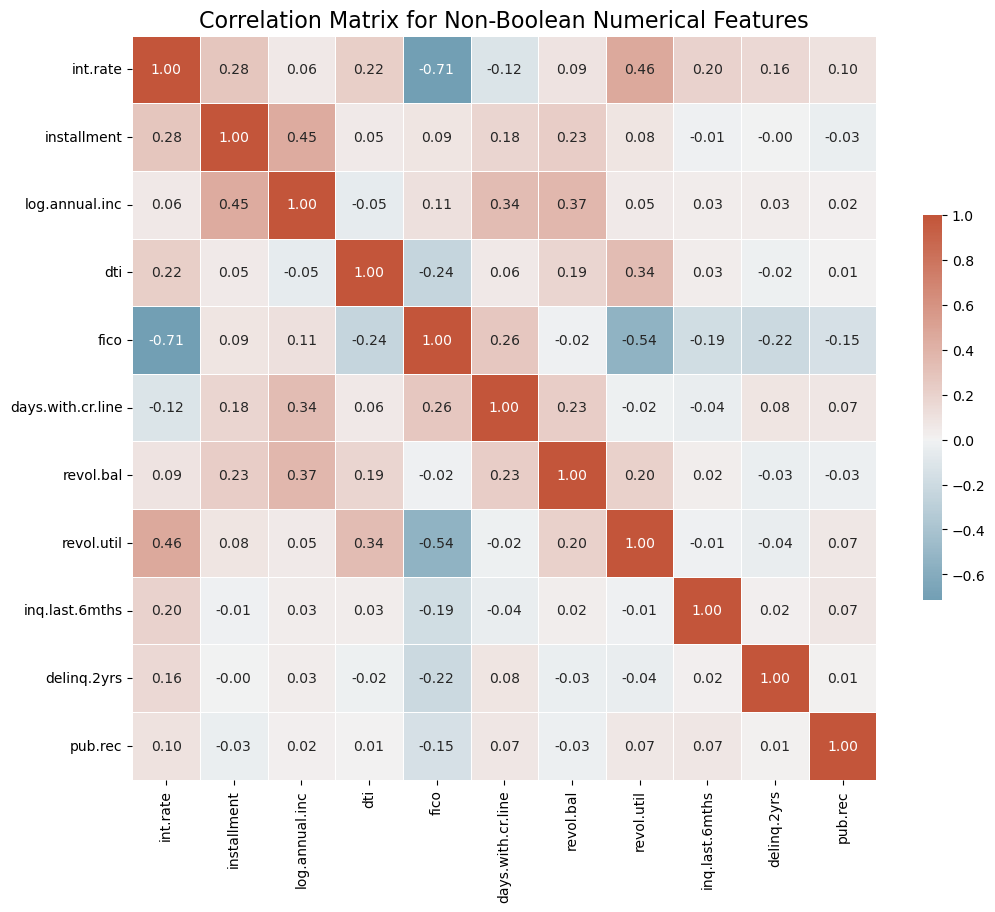

In [16]:
# Calculate the correlation matrix for non-boolean numerical features
corr_matrix = loan_data[non_boolean_numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix for Non-Boolean Numerical Features', fontsize=16)
plt.show()

In [17]:
# Implementing the suggested outlier handling strategy:

# Apply log transformation to features with heavy right-skewness
# Define a threshold for skewness
skewness_threshold = 1
for feature in non_boolean_numerical_features:
    if loan_data[feature].skew() > skewness_threshold:
        loan_data[f'{feature}_log'] = np.log1p(loan_data[feature])

# Identify and cap/floor the extreme values for numerical features
# Capping/Flooring at the 1st and 99th percentiles
for feature in non_boolean_numerical_features:
    lower_bound = loan_data[feature].quantile(0.01)
    upper_bound = loan_data[feature].quantile(0.99)
    loan_data[f'{feature}_capped'] = np.clip(loan_data[feature], lower_bound, upper_bound)

# Displaying the transformed data frame with additional columns for log-transformed and capped features
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,installment_capped,log.annual.inc_capped,dti_capped,fico_capped,days.with.cr.line_capped,revol.bal_capped,revol.util_capped,inq.last.6mths_capped,delinq.2yrs_capped,pub.rec_capped
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,829.10,11.350407,19.48,737,5639.958333,28854.0,52.1,0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,228.22,11.082143,14.29,707,2760.000000,33623.0,76.7,0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,366.86,10.373491,11.63,682,4710.000000,3511.0,25.6,1,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,162.34,11.350407,8.10,712,2699.958333,33667.0,73.2,1,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,102.92,11.299732,14.97,667,4066.000000,4740.0,39.5,0,1.0,0


In [21]:
from sklearn.preprocessing import PolynomialFeatures

# 1. Interaction Terms - Example: Interaction between 'fico' and 'int.rate'
loan_data['fico_int_rate_interaction'] = loan_data['fico_capped'] * loan_data['int.rate_capped']

# 2. Polynomial Features - Example: Creating a squared term for 'dti'
pf = PolynomialFeatures(degree=2, include_bias=False)
dti_poly = pf.fit_transform(loan_data[['dti_capped']])
loan_data['dti_squared'] = dti_poly[:, 1]

# 3. Grouping and Aggregation - Example: Mean 'fico' score by 'purpose'
fico_mean_by_purpose = loan_data.groupby('purpose')['fico_capped'].mean().rename('mean_fico_by_purpose')
loan_data = loan_data.join(fico_mean_by_purpose, on='purpose')

# 4. Binning - Example: Binning 'fico' scores into categories
loan_data['fico_category'] = pd.cut(loan_data['fico_capped'], bins=[300, 630, 689, 719, 850], labels=['Bad', 'Fair', 'Good', 'Excellent'])